In [0]:
from google.colab import drive

In [2]:
!ls

sample_data


In [3]:
drive.mount('/content/gdrive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp -r "/content/gdrive/My Drive/dataset/sketches/" .

In [6]:
!ls 'sketches/'

 airplane   bicycle	   cat	  dog	 horse
 bat	   'car_(sedan)'   deer   frog	 sailboat


In [8]:
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

Using TensorFlow backend.


In [0]:
train_datagen = ImageDataGenerator(
          rescale=1./255,
          rotation_range = 20,
          width_shift_range = 0.2,
          height_shift_range = 0.2,
          horizontal_flip = True,
)

In [12]:
train_set = train_datagen.flow_from_directory(
        './sketches/',
        batch_size = 20,
        class_mode='categorical',
        shuffle=True
)

Found 5508 images belonging to 10 classes.


In [13]:
train_set.class_indices

{'airplane': 0,
 'bat': 1,
 'bicycle': 2,
 'car_(sedan)': 3,
 'cat': 4,
 'deer': 5,
 'dog': 6,
 'frog': 7,
 'horse': 8,
 'sailboat': 9}

In [0]:
import matplotlib.pyplot as plt

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(16,(3,3),input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(16,(3,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(16,(3,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(16,(3,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 252, 252, 32)      4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 250, 250, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 123, 123, 16)      9232      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 121, 121, 32)      4640      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 119, 119, 64)      18496     
__________

In [19]:
model.fit_generator(train_set,
                   steps_per_epoch=20,
                   epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
20/20 [==============================] - 11s 542ms/step - loss: 0.3161 - acc: 0.9000
Epoch 2/100
20/20 [==============================] - 6s 303ms/step - loss: 0.3123 - acc: 0.9000
Epoch 3/100
20/20 [==============================] - 6s 325ms/step - loss: 0.3075 - acc: 0.9000
Epoch 4/100
20/20 [==============================] - 6s 284ms/step - loss: 0.3052 - acc: 0.9002
Epoch 5/100
20/20 [==============================] - 6s 279ms/step - loss: 0.3019 - acc: 0.8992
Epoch 6/100
20/20 [==============================] - 6s 280ms/step - loss: 0.2957 - acc: 0.9005
Epoch 7/100
20/20 [==============================] - 6s 279ms/step - loss: 0.2963 - acc: 0.9000
Epoch 8/100
20/20 [==============================] - 6s 280ms/step - loss: 0.2986 - acc: 0.9002
Epoch 9/100
20/20 [==============================] - 6s 282ms/step - loss: 0.2950 - acc: 0.9002
Epoch 10/100
20/20 [==============================] - 6s 282ms/step - loss: 0.2889 - ac

In [0]:
image_1, labels_1 = next(iter(train_set))

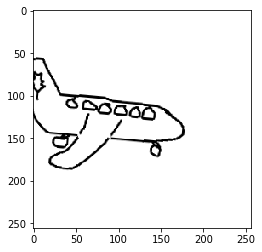

In [24]:
plt.imshow(image_1[6])

In [0]:
import numpy as np

In [27]:
np.argmax(model.predict(image_1[6].reshape(1,256,256,3)))

0

In [0]:
model.save('model6.h5')

In [30]:
!ls


gdrive	model6.h  model6.h5  sample_data  sketches


In [0]:
!rm model6.h

In [32]:
!ls

gdrive	model6.h5  sample_data	sketches


In [0]:
!cp -r "model6.h5" '/content/gdrive/My Drive/SketchyGAN/'